# 15) Linear Algebra


## Today

 1. Matrices as linear transformations  
 2. Polynomial evaluation and fitting  
 3. Orthogonality

In [1]:
using Plots
default(linewidth=4, legendfontsize=12)

## 1. Matrices as linear transformations

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.  The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  The familiar definition,

$$ y_i = \sum_j A_{i,j} x_j $$

can also be viewed as

$$ y = \Bigg[ A_{:,1} \Bigg| A_{:,2} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_1 \\ x_2 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,1} \Bigg] x_1 + \Bigg[ A_{:,2} \Bigg] x_2 + \dotsb . $$

### Math and Julia Notation

The notation $A_{i,j}$ corresponds to the Julia syntax `A[i,j]` and the colon `:` means the entire range (row or column).  So $A_{:,j}$ is the $j$th column and $A_{i,:}$ is the $i$th row.  The corresponding Julia syntax is `A[:,j]` and `A[i,:]`.

Julia has syntax for row vectors, column vectors, and arrays.

In [2]:
[1. 2 3; 4 5 6]
# compare with Python's syntax: np.array([[1, 2, 3], [4, 5, 6]])

2×3 Matrix{Float64}:
 1.0  2.0  3.0
 4.0  5.0  6.0

In [3]:
[1 2 ; 4 3]

2×2 Matrix{Int64}:
 1  2
 4  3

In [4]:
[1 0; 0 2; 10 3]

3×2 Matrix{Int64}:
  1  0
  0  2
 10  3

In [5]:
[1; 2 + 1im; 3]' # transpose

1×3 adjoint(::Vector{Complex{Int64}}) with eltype Complex{Int64}:
 1+0im  2-1im  3+0im

### Implementing multiplication by row

In [6]:
function matmult1(A, x)
    m, n = size(A)
    y = zeros(m)
    for i in 1:m
        for j in 1:n
            y[i] += A[i,j] * x[j]
        end
    end
    y
end

A = reshape(1.:12, 3, 4) # 3x4 matrix
x = [10., 0, 0, 0]
matmult1(A, x)

3-element Vector{Float64}:
 10.0
 20.0
 30.0

In [7]:
# Dot product
A[2, :]' * x

20.0

In [8]:
function matmult2(A, x)
    m, n = size(A)
    y = zeros(m)
    for i in 1:m
        y[i] = A[i,:]' * x
    end
    y
end

matmult2(A, x)

3-element Vector{Float64}:
 10.0
 20.0
 30.0

### Implementing multiplication by column


In [9]:
function matmult3(A, x)
    m, n = size(A)
    y = zeros(m)
    for j in 1:n
        y += A[:, j] * x[j]
    end
    y
end

matmult3(A, x)

3-element Vector{Float64}:
 10.0
 20.0
 30.0

In [10]:
A * x # We'll use this version

3-element Vector{Float64}:
 10.0
 20.0
 30.0

## 2. Polynomial evaluation 
### Polynomial evaluation is (continuous) linear algebra
We can evaluate polynomials using matrix-vector multiplication.
For example,
$$ - 3x + 5x^3 = \Bigg[ 1 \Bigg|\, x \Bigg|\, x^2 \,\Bigg|\, x^3 \Bigg] \begin{bmatrix}0 \\ -3 \\ 0 \\ 5 \end{bmatrix} . $$

In [11]:
using Pkg
Pkg.add("Polynomials")

using Polynomials
P(x) = Polynomial(x)

p = [0, -3, 0, 5]
q = [1, 2, 3, 4]
f = P(p) + P(q)
@show f
@show P(p+q)
x = [0., 1, 2]
f.(x)

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


f = Polynomial(1 - x + 3*x^2 + 9*x^3)
P(p + q) = Polynomial(1 - x + 3*x^2 + 9*x^3)


3-element Vector{Float64}:
  1.0
 12.0
 83.0

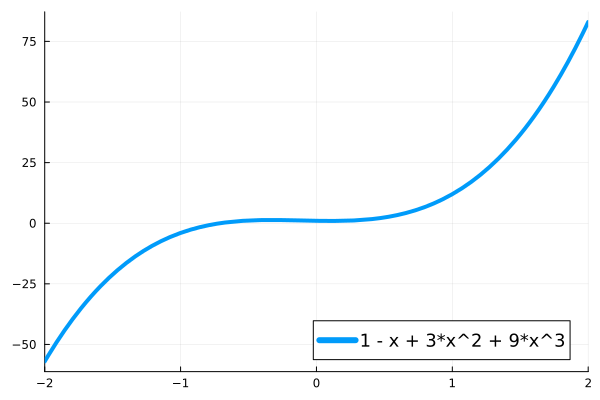

In [12]:
plot(f, legend=:bottomright, xlim=(-2, 2))

### Polynomial evaluation is (discrete) linear algebra

In [13]:
V = [one.(x) x x.^2 x.^3]

3×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0
 1.0  2.0  4.0  8.0

In [14]:
V * p + V * q

3-element Vector{Float64}:
  1.0
 12.0
 83.0

In [15]:
V * (p + q)

3-element Vector{Float64}:
  1.0
 12.0
 83.0

### Vandermonde matrices

A Vandermonde matrix is one whose columns are functions evaluated at discrete points.

$$V(x) = \begin{bmatrix} 1 \Bigg| x \Bigg| x^2 \Bigg| x^3 \Bigg| \dotsb \end{bmatrix}$$

In [16]:
function vander(x, k=nothing)
    if isnothing(k)
        k = length(x)
    end
    m = length(x)
    V = ones(m, k)
    for j in 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

vander (generic function with 2 methods)

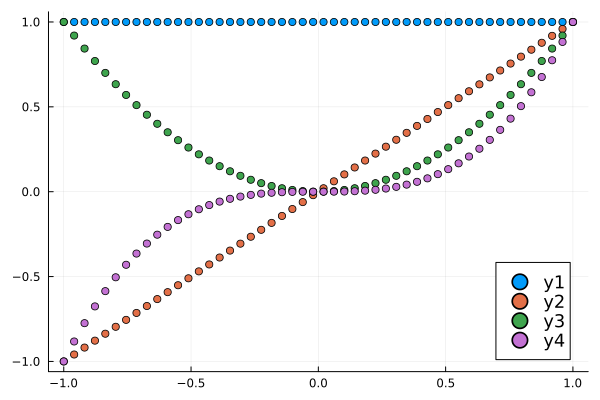

In [17]:
x = LinRange(-1, 1, 50)
V = vander(x, 4)
scatter(x, V, legend=:bottomright)

### Fitting is linear algebra

$$ \underbrace{\begin{bmatrix} 1 \Bigg| x \Bigg| x^2 \Bigg| x^3 \Bigg| \dotsb \end{bmatrix}}_{V(x)} \Big[ p \Big] = \Bigg[ y \Bigg]$$

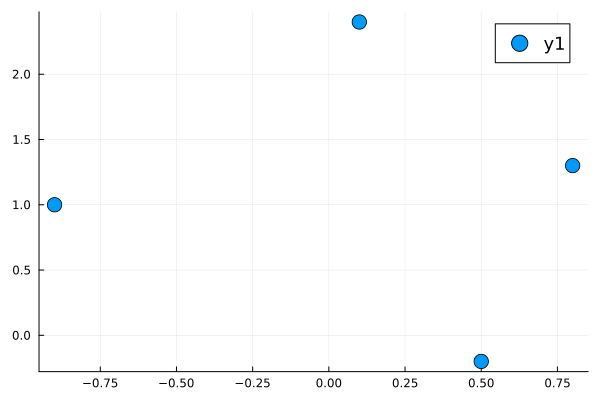

In [18]:
x1 = [-.9, 0.1, .5, .8]
y1 = [1, 2.4, -.2, 1.3]
scatter(x1, y1, markersize=8)

size(V) = (4, 4)


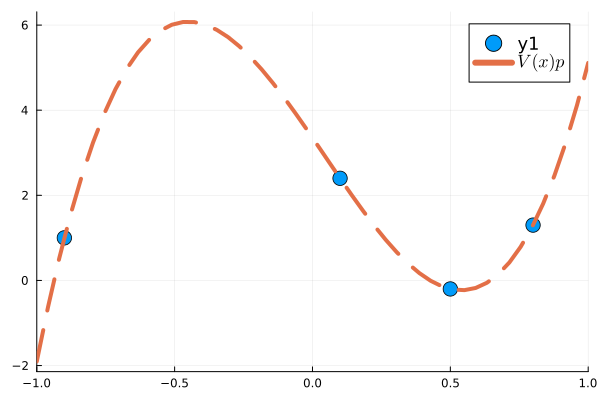

In [19]:
V = vander(x1)
@show size(V)
p = V \ y1 # write y1 in the polynomial basis
scatter(x1, y1, markersize=8, xlims=(-1, 1))
#plot!(P(p), label="P(p)")
plot!(x, vander(x, 4) * p, label="\$ V(x) p\$", linestyle=:dash)

### Some common terminology

* The **range** of $A$ is the space spanned by its columns.  This definition coincides with the range of a function $f(x)$ when $f(x) = A x$.
* The (right) **nullspace** of $A$ is the space of vectors $x$ such that $A x = 0$.
* The **rank** of $A$ is the dimension of its range.
* A matrix has **full rank** if the nullspace of either $A$ or $A^T$ is empty (only the 0 vector).  Equivalently, if all the columns of $A$ (or $A^T$) are linearly independent.
* A **nonsingular** (or **invertible**) matrix is a square matrix of full rank.  We call the inverse $A^{-1}$ and it satisfies $A^{-1} A = A A^{-1} = I$.

$\DeclareMathOperator{\rank}{rank} \DeclareMathOperator{\null}{null} $
If $A \in \mathbb{R}^{m\times m}$, which of these doesn't belong?
1. $A$ has an inverse $A^{-1}$
2. $\rank (A) = m$
3. $\null(A) = \{0\}$
4. $A A^T = A^T A$
5. $\det(A) \ne 0$
6. $A x = 0$ implies that $x = 0$

In [20]:
Pkg.add("LinearAlgebra")
using LinearAlgebra

A = rand(4, 4)
B = A' * A - A * A'
@show B
det(A)

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


B = [-1.3203635850630313 -0.026516769391518147 -0.37728207612679565 -0.23927904723571491; -0.026516769391518147 0.27037258518144125 0.1707672769442211 -0.08287528513402198; -0.37728207612679565 0.1707672769442211 0.7358807299929382 0.3960292773139834; -0.23927904723571491 -0.08287528513402198 0.3960292773139834 0.314110269888652]


0.13352422149384113

### What is an inverse?

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.
(It is rare that we explicitly compute a matrix $A^{-1}$, though [it's not as "bad"](https://arxiv.org/abs/1201.6035) as people may have told you.)
A vector $y$ is equivalent to $\sum_i e_i y_i$ where $e_i$ are columns of the identity.
Meanwhile, $x = A^{-1} y$ means that we are expressing that same vector $y$ in the basis of the columns of $A$, i.e., $\sum_i A_{:,i} x_i$.


In [21]:
using LinearAlgebra
A = rand(4, 4)

4×4 Matrix{Float64}:
 0.10645   0.321422  0.160453  0.835804
 0.054808  0.176957  0.825975  0.496877
 0.777951  0.285276  0.869421  0.816537
 0.423479  0.153784  0.400713  0.49123

In [22]:
A \ A

4×4 Matrix{Float64}:
  1.0          0.0  -9.32766e-17  0.0
 -2.56771e-15  1.0  -1.30233e-15  0.0
 -5.23012e-17  0.0   1.0          0.0
  1.02356e-15  0.0   5.1179e-16   1.0

In [23]:
inv(A) * A

4×4 Matrix{Float64}:
  1.0           7.07427e-17   1.84735e-16   2.70865e-16
 -4.39871e-15   1.0          -1.06693e-15  -1.11158e-15
 -1.26469e-17   3.96403e-17   1.0           5.33959e-17
  2.33885e-16  -8.44923e-16  -1.19913e-15   1.0

## 3. Orthogonality

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about their magnitude and about the angle.
The **norm** is induced by the inner product,
$$ \lVert x \rVert = \sqrt{x^T x} $$
and the angle $\theta$ is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$
Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties
$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y \\
\end{split} . $$

### Examples with inner products

In [24]:
x = [0, 1]
y = [1, 1]
@show x' * y
@show y' * x;

x' * y = 1
y' * x = 1


In [25]:
ϕ = pi/6
y = [cos(ϕ), sin(ϕ)]
cos_θ = x'*y / (norm(x) * norm(y))
@show cos_θ
@show cos(ϕ-pi/2);

cos_θ = 0.49999999999999994
cos(ϕ - pi / 2) = 0.4999999999999999


### Polynomials can be orthogonal too!


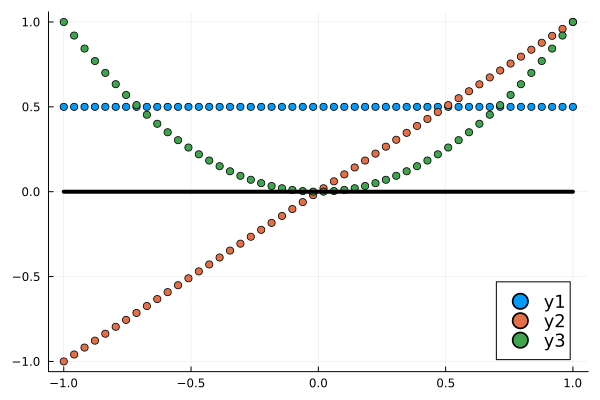

In [26]:
x = LinRange(-1, 1, 50)
A = vander(x, 4)
M = A * [.5 0 0 0; # 0.5
         0  1 0 0;  # x
         0  0 1 0]' # x^2
scatter(x, M)
plot!(x, 0*x, label=:none, color=:black)

* Which inner product will be zero?

  * Which functions are even and odd?

### Polynomial inner products

In [27]:
M[:,1]' * M[:,2]

-2.220446049250313e-16

In [28]:
M[:,1]' * M[:,3]

8.673469387755102

In [29]:
M[:,2]' * M[:,3]

-4.440892098500626e-16